### Introduction

Objectives of this notebook on Nomand dataset are as follows:
- Visulization the quality issues of Nomand dataset
- Implement a basic KF to fusing two sensors
- Compare the performance of the KF with the original data

### Visulization

In [2]:
# open csv

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read csv
df_ = pd.read_csv(r'..\Data\Noman_logging\logging_mar3_gps.csv')

In [3]:
df_

id  project_id  train_id  box_id  valid   latitude  \
0        1040114929           4        12       2      0   0.000000   
1        1040114930           4        40       1      1  54.970610   
2        1040114931           4        12       2      0   0.000000   
3        1040114932           4        40       1      1  54.970610   
4        1040114933           4        40       1      1  54.970610   
...             ...         ...       ...     ...    ...        ...   
5037022  1045154844           4        27       2      1  50.059956   
5037023  1045154845           4        17       1      1  50.705273   
5037024  1045154846           4        14       2      1  52.181060   
5037025  1045154847           4        21       1      1  50.876434   
5037026  1045154848           4        17       2      1  50.706078   

         longitude  altitude       speed   heading            timestamp  
0         0.000000     0.000     0.00000    0.0000  2023-12-01 00:00:01  
1        -1.604899     0.000  1517.87510   83.4600  2023-12-01 00:00:01  
2         0.000000     0.000     0.00000    0.0000  2023-12-01 00:00:02  
3        -1.604899     0.000  1517.87510   83.4600  2023-12-01 00:00:02  
4        -1.604899     0.000  1520.88830   84.1700  2023-12-01 00:00:03  
...            ...       ...         ...       ...                  ...  
5037022   2.872531   118.593   282.98880  353.3864  2023-12-08 11:49:34  
5037023   2.722421    19.207   286.51678  107.8355  2023-12-08 11:49:34  
5037024   4.590192     4.800    78.18840   53.3200  2023-12-08 11:49:34  
5037025   1.824230    26.800   242.48160  338.9800  2023-12-08 11:49:34  
5037026   2.718455    18.785   286.68240  107.6885  2023-12-08 11:49:34  

[5037027 rows x 11 columns]

In [4]:
# add date
df_['timestamp'] = pd.to_datetime(df_['timestamp'])
df_['date'] = df_['timestamp'].dt.normalize()

# QC
## exclude invalid data
df = df_[df_['valid'] != 0]

C:\Users\ZOZN109\AppData\Local\Temp\ipykernel_10992\4146907753.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['train_id_offset'] = df['train_id'] + (0.2 * (df['box_id'] - 1))


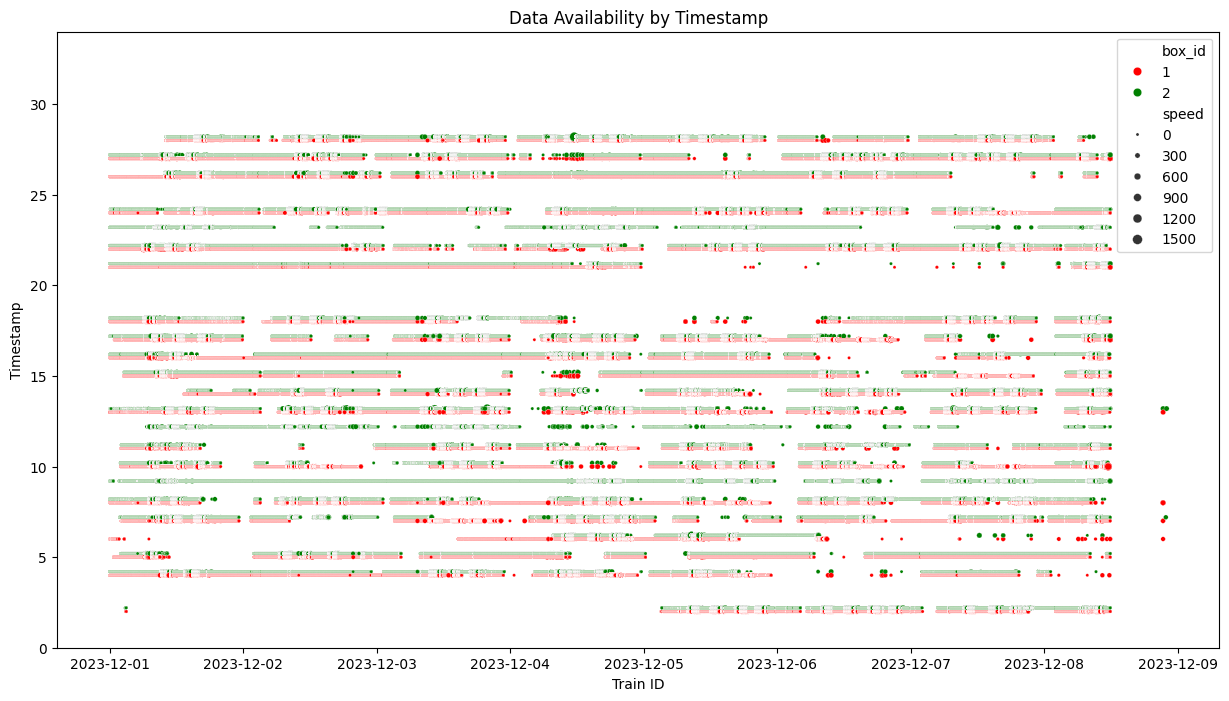

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a color map for box_id
colors = {1: 'red', 2: 'green'}
df['train_id_offset'] = df['train_id'] + (0.2 * (df['box_id'] - 1))

# Create a scatter plot
plt.figure(figsize=(15, 8))
sns.scatterplot(y='train_id_offset', x='timestamp', hue='box_id', palette=colors, size='speed', sizes=(5, 50), data=df)

# Set plot title and labels
plt.title('Data Availability by Timestamp')
plt.xlabel('Train ID')
plt.ylabel('Timestamp')

# Set x-axis limit
plt.ylim(0, 34)

# Show the plot
plt.show()

In [304]:
df_4 = df[(df['train_id'] == 4) & (df['date'] == '2023-12-01')]


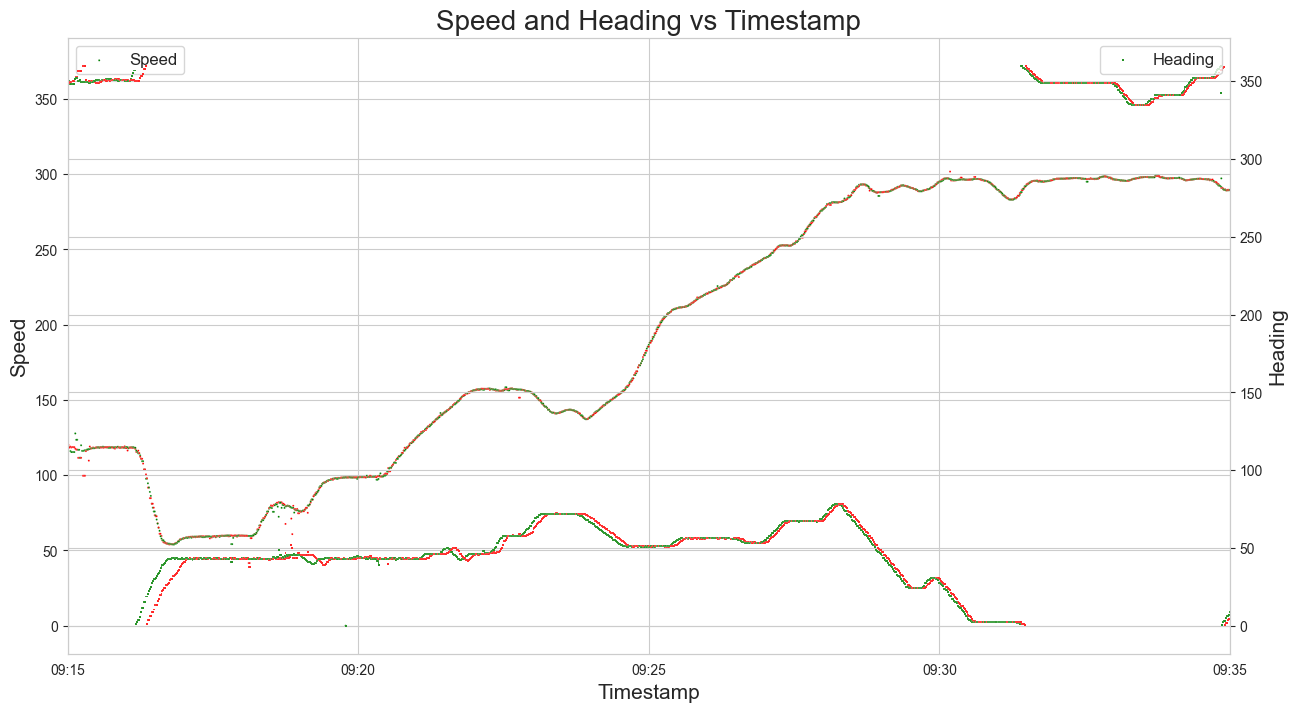

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Use a seaborn style
sns.set_style("whitegrid")

colors = {1: 'red', 2: 'green'}

# Create a scatter plot for speed
fig, ax1 = plt.subplots(figsize=(15, 8))
sns.scatterplot(x='timestamp', y='speed', hue='box_id', palette=colors, marker='o', s=2, data=df_4, ax=ax1, legend=False)

# Create a second y-axis for heading
ax2 = ax1.twinx()
sns.scatterplot(x='timestamp', y='heading', hue='box_id', palette=colors, marker='s', s=2, data=df_4, ax=ax2, legend=False)

# Set plot title and labels
ax1.set_title('Speed and Heading vs Timestamp', fontsize=20)
ax1.set_xlabel('Timestamp', fontsize=15)
ax1.set_ylabel('Speed', fontsize=15)
ax2.set_ylabel('Heading', fontsize=15)
ax1.set_xlim(pd.to_datetime('2023-12-01 09:15:00'), pd.to_datetime('2023-12-01 09:35:00'))

# Format the x-axis labels
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Add a legend
ax1.legend(['Speed'], loc='upper left', fontsize=12)
ax2.legend(['Heading'], loc='upper right', fontsize=12)

# Show the plot
plt.show()

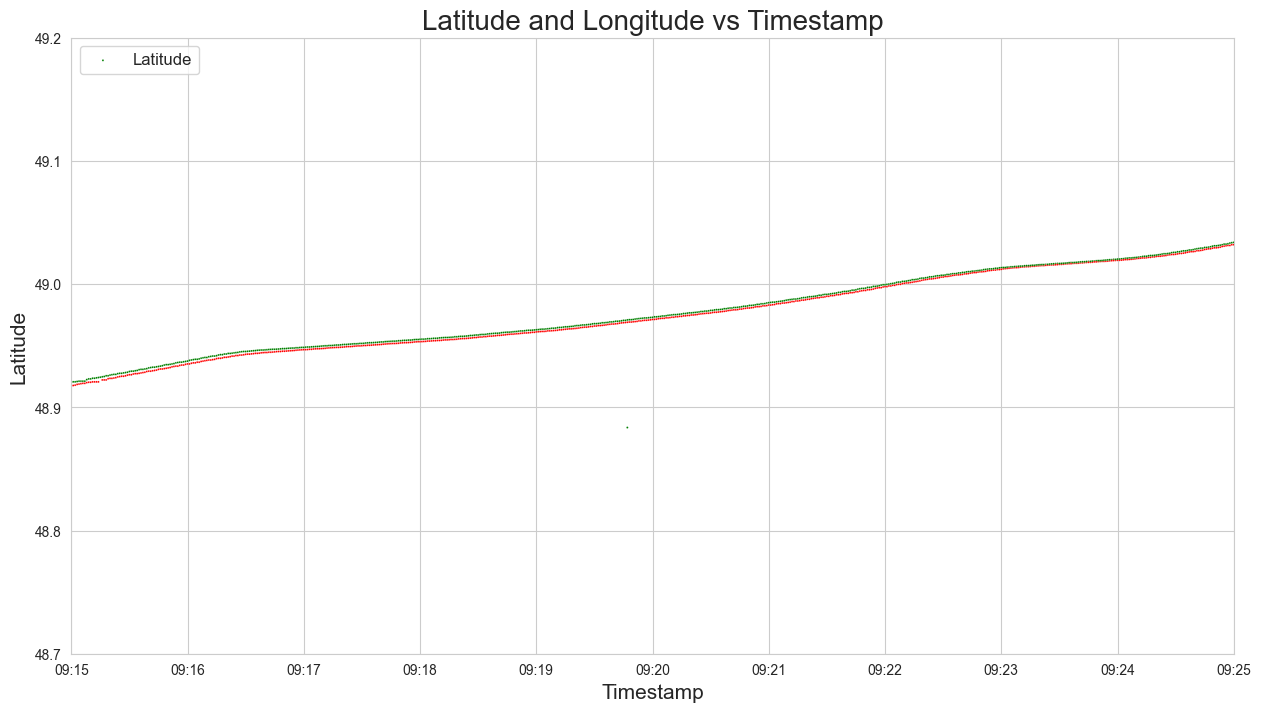

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Use a seaborn style
sns.set_style("whitegrid")

colors = {1: 'red', 2: 'green'}

# Create a scatter plot for latitude
fig, ax1 = plt.subplots(figsize=(15, 8))
sns.scatterplot(x='timestamp', y='latitude', hue='box_id', palette=colors, marker='o', s=2, data=df_4, ax=ax1, legend=False)

# Create a second y-axis for longitude
#ax2 = ax1.twinx()
#sns.scatterplot(x='timestamp', y='longitude', hue='box_id', palette=colors, marker='s', s=2, data=df_4, ax=ax2, legend=False)

# Set plot title and labels
ax1.set_title('Latitude and Longitude vs Timestamp', fontsize=20)
ax1.set_xlabel('Timestamp', fontsize=15)
ax1.set_ylabel('Latitude', fontsize=15)
#ax2.set_ylabel('Longitude', fontsize=15)
ax1.set_xlim(pd.to_datetime('2023-12-01 09:15:00'), pd.to_datetime('2023-12-01 09:25:00'))

# Format the x-axis labels
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Add a legend
ax1.legend(['Latitude'], loc='upper left', fontsize=12)
#ax2.legend(['Longitude'], loc='upper right', fontsize=12)
plt.ylim(48.7, 49.2)
# Show the plot
plt.show()

In [221]:
math.cos(math.radians(90))

6.123233995736766e-17

In [268]:
import folium
import numpy as np
import utm
import math
# Create a map centered at the mean latitude and longitude values
import branca

# Create a map centered at the mean latitude and longitude values
m = folium.Map(location=[df_4['latitude'].iloc[0], df_4['longitude'].iloc[0]], zoom_start=13)


def calculate_end_point(lat, lon, speed, heading, seconds):
    # Convert start point to UTM
    e, n, zone_number, zone_letter = utm.from_latlon(lat, lon)

    # Calculate the end point in UTM coordinates
    delta_n = speed / 3.6 * math.cos(math.radians(heading)) * seconds
    delta_e = speed / 3.6 * math.sin(math.radians(heading)) * seconds
    n2 = n + delta_n
    e2 = e + delta_e

    # Convert end point back to lat/lon
    lat2, lon2 = utm.to_latlon(e2, n2, zone_number, zone_letter)

    return lat2, lon2

# Add arrows to the map
for idx, row in df_4.iterrows():
    lat, lon = row['latitude'], row['longitude']
    box_id = row['box_id']
    end_lat, end_lon = calculate_end_point(lat, lon, row['speed'], row['heading'], 0.1)  # Calculate position 5 seconds later

    color = "red" if box_id == 1 else "green" if box_id == 2 else "blue"
    if row['timestamp'] < pd.to_datetime('2023-12-01 9:40:00'):
        folium.PolyLine([(lat, lon), (end_lat, end_lon)],tooltip={'t':row['timestamp'],
                                                                'heading':row['heading']}, color=color).add_to(m)

# Display the map
m

### Oreintation check


In [325]:
def calculate_linear_orientation(df):
    '''
    Using the predisct position to calculate the orientation
    '''


    # convert lat/lon to UTM
    e,n,zone_number,zone_letter = utm.from_latlon(df['latitude'].values,df['longitude'].values)
    df.loc[:,'e'] = e
    df.loc[:,'n'] = n

    # Calculate the difference in time between the current and previous row
    df['time_difference'] = df['timestamp'].diff().dt.total_seconds().fillna(0)

    # Calculate the next 'e' and 'n' values based on the current speed and heading
    df['next_e'] = df['e'] + df['time_difference'] * df['speed'] * np.sin(np.radians(df['heading']))
    df['next_n'] = df['n'] + df['time_difference'] * df['speed'] * np.cos(np.radians(df['heading']))

    # Calculate the difference in 'n' and 'e' between the current and previous row
    df['difference_n'] = df['n'] - df['next_n'].shift(1)
    df['difference_e'] = df['e'] - df['next_e'].shift(1)

    # Calculate the offset using the Pythagorean theorem
    df['offset'] = np.sqrt(df['difference_n']**2 + df['difference_e']**2)

    # Calculate the orientation using the arctan2 function and normalize it to the range 0 to 360
    df['orientation'] = (np.degrees(np.arctan2(df['difference_n'], df['difference_e'])) + 360) % 360

    # Calculate the difference in 'box_id' between the current and previous row
    df['box_id_d'] = df['box_id'] - df['box_id'].shift(1)

    return df

df_more = calculate_linear_orientation(df_4)

C:\Users\ZOZN109\AppData\Local\Temp\ipykernel_29860\1362631287.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_difference'] = df['timestamp'].diff().dt.total_seconds().fillna(0)
C:\Users\ZOZN109\AppData\Local\Temp\ipykernel_29860\1362631287.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['next_e'] = df['e'] + df['time_difference'] * df['speed'] * np.sin(np.radians(df['heading']))
C:\Users\ZOZN109\AppData\Local\Temp\ipykernel_29860\1362631287.py:12: SettingWithCopyWarning: 
A value is tr

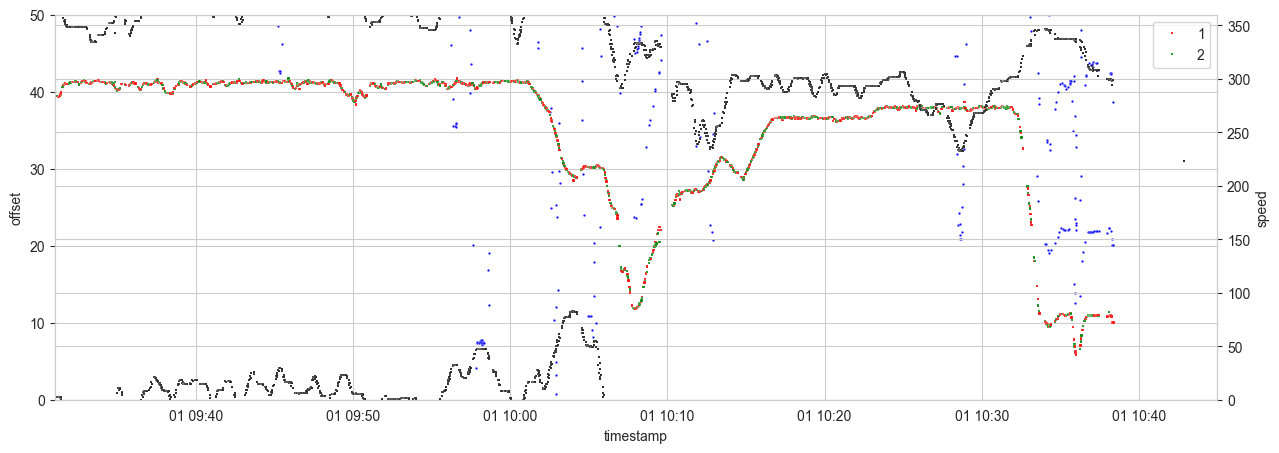

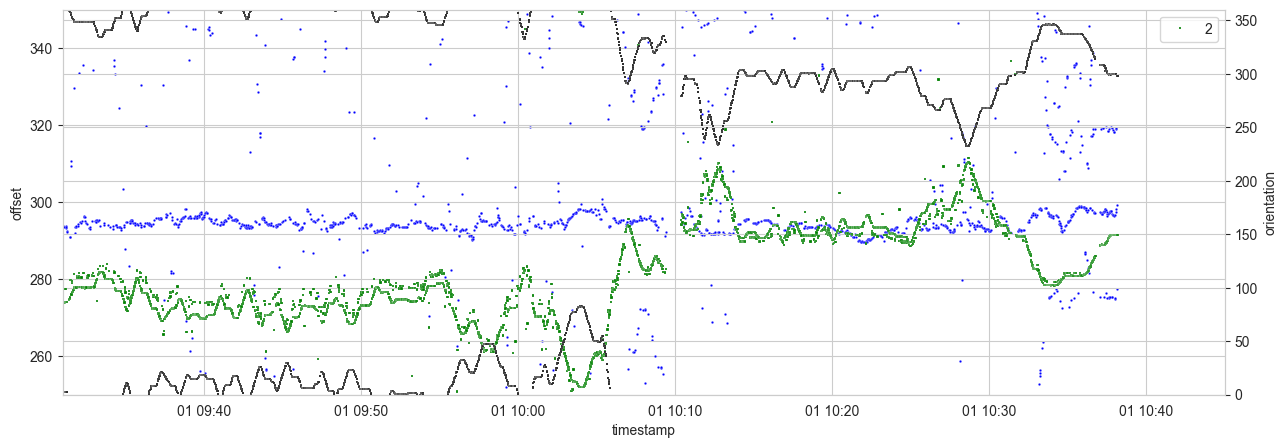

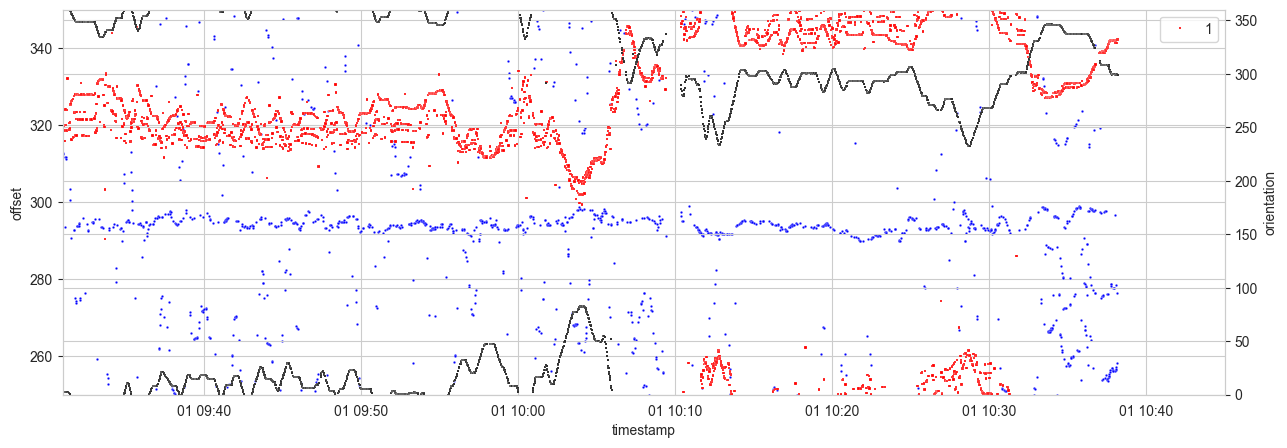

In [331]:

def plot_offset_and_orientation(df_4, box_id=0,xlim=(0, 50),y_2 ='heading',ylim=(0, 360)):

    df =df_4[(df_4['box_id_d'] == box_id) & (abs(df_4['speed_d']) < 5)]

    # Create a scatter plot for offset
    fig, ax1 = plt.subplots(figsize=(15, 5))
    colors = {1: 'red', 2: 'green'}
    sns.scatterplot(x='timestamp', y='offset', marker='o', s=3, data=df, ax=ax1, color='blue')
    ax1.set_xlim(pd.to_datetime('2023-12-01 9:31:00'), pd.to_datetime('2023-12-01 10:45:00'))

    # plot the orientation
    ax2 = ax1.twinx()
    sns.scatterplot(x='timestamp', y=y_2, marker='s', s=3, data=df, ax=ax2, hue='box_id', palette=colors)
    sns.scatterplot(x='timestamp', y='heading', marker='s', s=3, data=df, ax=ax2, color='black')

    # Set y-axis limits for both axes
    ax1.set_ylim(xlim)
    ax2.set_ylim(ylim)

plot_offset_and_orientation(df_4,0,y_2='speed',xlim=(0, 50),ylim=(0, 360))
plot_offset_and_orientation(df_4,1,(250,350),y_2='orientation',ylim=(0, 360))
plot_offset_and_orientation(df_4,-1,(250,350),y_2='orientation',ylim=(0, 360))



### Visulization of the original data

In [7]:
import plotly.graph_objs as go
from ipywidgets import widgets, Output, VBox, HBox
from IPython.display import display
import plotly.io as pio
pio.mapbox_access_token = 'pk.eyJ1IjoibGl1aDg4NiIsImEiOiJjbGNoY21pcjcwbXU4M29xdTJvN3E2cDl0In0.J-SctLThqdB2fZhbXTmF-g'

# Assuming df is your DataFrame and it's already defined with the required columns

# Widgets for selecting Train ID, Box ID, and Date
train_id_widget = widgets.SelectMultiple(
    options=df['train_id'].unique(),
    description='Train ID:',
    disabled=False
)

box_id_widget = widgets.SelectMultiple(
    options=df['box_id'].unique(),
    description='Box ID:',
    disabled=False
)

date_widget = widgets.SelectMultiple(
    options=df['date'].unique(),
    description='Date:',
    disabled=False
)

# Output widget for the plots
out = Output()

# Initialize the FigureWidget with layout adjustments for side-by-side plots
placeholder_fig = go.FigureWidget(
    layout=go.Layout(
        width=1500,  # Set the overall width of the figure
        height=500,  # Set the overall height of the figure
        margin=dict(t=50, l=50, b=50, r=50),  # Adjust margins to prevent clipping
        mapbox=dict(  # Configure the geolocation plot domain
            domain=dict(x=[0, 0.30], y=[0, 1]),
            center=dict(lat=51.8, lon=2),
            style='open-street-map',  # Using OpenStreetMap style
            zoom=5,  # Adjust the zoom level as needed
        ),
        xaxis=dict(  # Configure the domain for the speed plot's x-axis
            domain=[0.35, 1],
            title='Time'
        ),
        yaxis=dict(  # Configure the domain for the speed plot's y-axis
            domain=[0, 1],
            title='Speed'
        )
    )
)

placeholder_fig.add_trace(go.Scattermapbox(
    lat=[],  # Latitude data will be set in the plot_data function
    lon=[],  # Longitude data will be set in the plot_data function
    mode='lines+markers',  # Display markers for each point
))

# Add a Scatter trace for the speed plot data
placeholder_fig.add_trace(go.Scatter(
    x=[],  # X data (Time) will be set in the plot_data function
    y=[],  # Y data (Speed) will be set in the plot_data function
    xaxis='x',  # Link this trace to the speed plot's x-axis
    yaxis='y',  # Link this trace to the speed plot's y-axis
    mode='lines',  # Display lines and markers
))

# Display the placeholder figure in the output widget
with out:
    out.clear_output()
    display(placeholder_fig)

def plot_data(train_ids, box_ids, dates):
    filtered_df = df[df['train_id'].isin(train_ids) & df['box_id'].isin(box_ids) & df['date'].isin(dates)]
    
    if filtered_df.empty:
        with out:
            print("No data to display for the selected filters.")
        return
    
    # Sort the filtered DataFrame by timestamp
    filtered_df = filtered_df.sort_values(by='timestamp')

    # Update geolocation plot in the placeholder figure
    placeholder_fig.data[0].lat = filtered_df['latitude']
    placeholder_fig.data[0].lon = filtered_df['longitude']
    
    # Update time chart of speed in the placeholder figure
    placeholder_fig.data[1].x = filtered_df['timestamp']
    placeholder_fig.data[1].y = filtered_df['speed']


# Bind the widgets to the plotting function
interactive_plot = widgets.interactive_output(plot_data, {
    'train_ids': train_id_widget,
    'box_ids': box_id_widget,
    'dates': date_widget
})

# Setup layout for the widgets and the output container
widget_box = HBox([train_id_widget, box_id_widget, date_widget])  # Arrange widgets horizontally
display(VBox([widget_box, out]))  # Display widgets above the output container


In [46]:
df.dtypes

id                     int64
project_id             int64
train_id               int64
box_id                 int64
valid                  int64
latitude             float64
longitude            float64
altitude             float64
speed                float64
heading              float64
timestamp     datetime64[ns]
date                  object
dtype: object

In [39]:
df.date

0          2023-12-01
1          2023-12-01
2          2023-12-01
3          2023-12-01
4          2023-12-01
              ...    
5037022    2023-12-08
5037023    2023-12-08
5037024    2023-12-08
5037025    2023-12-08
5037026    2023-12-08
Name: date, Length: 5037027, dtype: object

In [59]:
# Filter by train_id
train_filtered = df[(df['train_id'] == 12) & (df['box_id'] == 2)]

# Finally, check the date
print(train_filtered['date'] == pd.Timestamp('2023-12-01'))


0           True
2           True
5           True
6           True
8           True
           ...  
5035922    False
5036189    False
5036432    False
5036714    False
5036986    False
Name: date, Length: 146638, dtype: bool
